In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df  = pd.read_csv('emails.csv')

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


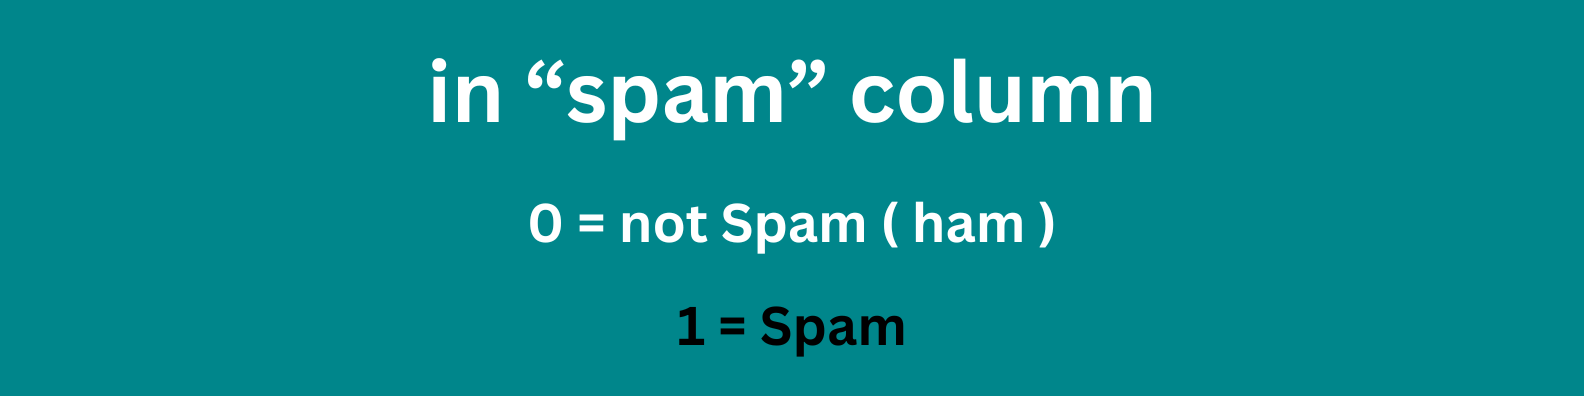

In [4]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

# Let's drop duplicate mails

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

In [7]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


# Let's check null values

In [8]:
df.isnull().sum()

text    0
spam    0
dtype: int64

no null value present to the Dataset🥳

# Let's separate x & y

In [9]:
x = df.text.values

In [10]:
y = df.spam.values

# Let's split Dataset

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# Data Preprocessing

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

we have to create an object for CountVectorizer

In [14]:
cv = CountVectorizer()
x_train = cv.fit_transform(xtrain)

let's see the array

In [15]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Lets use ML Algo

We use here "Naive Bayes Classifier"

In [16]:
from sklearn.naive_bayes import MultinomialNB

create an object for MultinomialNB

In [17]:
model = MultinomialNB()
model.fit(x_train,ytrain)

MultinomialNB()

x_train because xtrain is preprocessed to x_train

lett's do it for x_test

In [18]:
x_test = cv.transform(xtest)

In [19]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
model.score(x_test,ytest)

0.9912203687445127

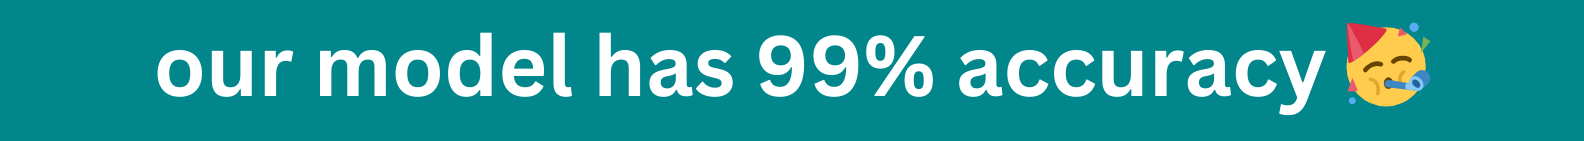

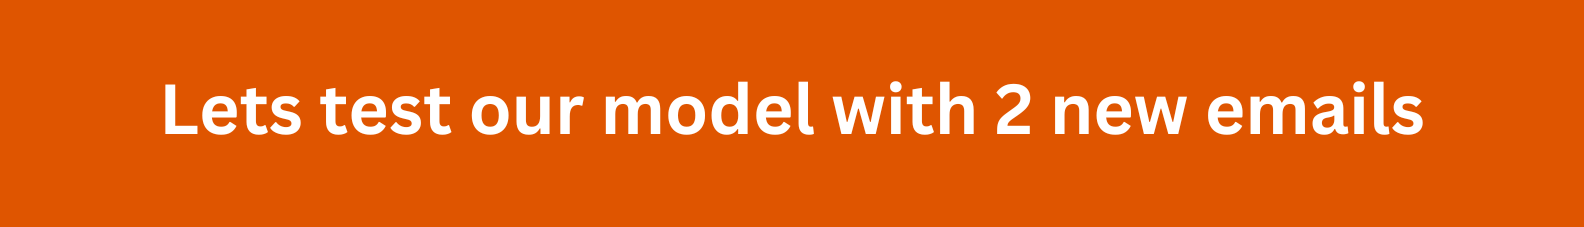

In [21]:
emails = [
    'hey I am looking for Machine Learning tutorial in English',
    'hey you win a iphone giveaway for free please do the survey'
]

but our model don't understand this, so we have to transform it using vectorization

In [22]:
cv_emails = cv.transform(emails)

Let's predict the mails are ham or spam

In [23]:
model.predict(cv_emails)

array([0, 1])

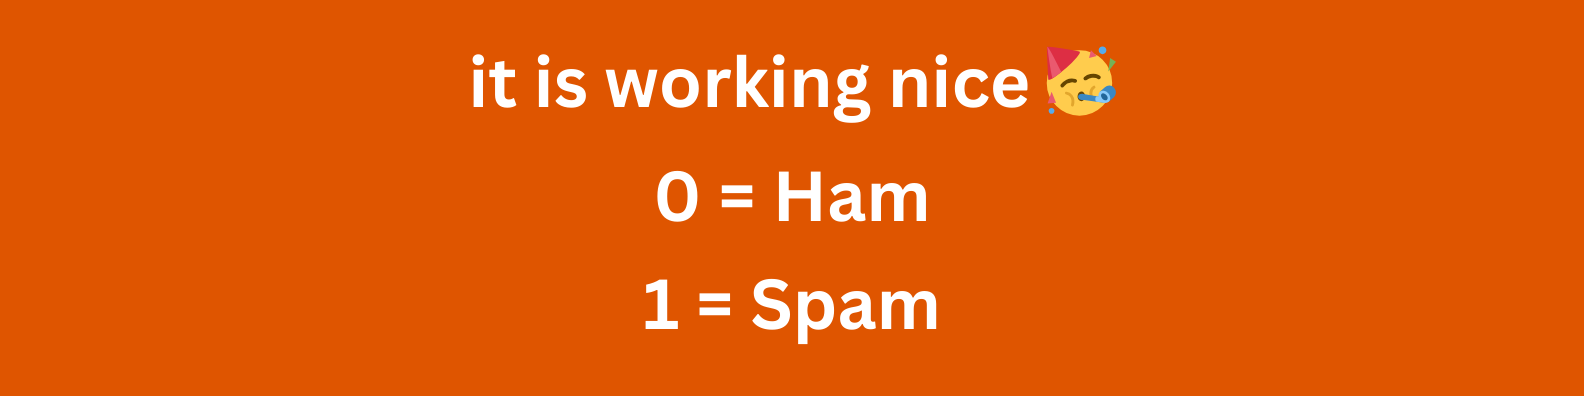